In [2]:
import pandas as pd 

insurance=pd.read_csv("insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# one hot encoder
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [11]:
X=insurance_one_hot.drop(["charges"],axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [13]:
y=insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape,y_train.shape,X_test.shape

((1070, 11), (1070,), (268, 11))

In [50]:
import tensorflow as tf
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[None,32,11]),
    tf.keras.layers.Dense(1),

])

model.compile(loss=tf.keras.losses.mae,metrics=["mae"] ,optimizer=tf.keras.optimizers.SGD())


In [52]:
import numpy as np
import numpy as np

# Assuming X_train and y_train are your input data
X_train = X_train.astype(np.float32)  # Convert to float32 if not already
y_train = y_train.astype(np.float32)  # Convert to float32 if not already

model.fit(X_train,y_train,epochs=100,verbose=0)

In [54]:
# check the results on test data
X_test = X_test.astype(np.float32)  # Convert to float32 if not already
y_test = y_test.astype(np.float32)  
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7165.6240 - mae: 7165.6240


[7165.6240234375, 7165.6240234375]

In [72]:
import tensorflow as tf
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[None,32,11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),


])

model_2.compile(loss=tf.keras.losses.mae,metrics=["mae"] ,optimizer=tf.keras.optimizers.Adam())
history=model_2.fit(X_train,y_train,epochs=300,verbose=0)

In [73]:
model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3225.8450 - mae: 3225.8450


[3225.844970703125, 3225.844970703125]

<Axes: >

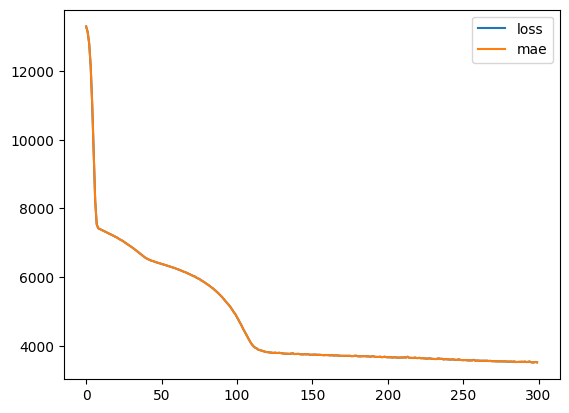

In [74]:
# plot history , training curve

pd.DataFrame(history.history).plot()
# plt.plot(history.history['val_accuracy'])
